### Running the RL agent on-the-fly on Matt's hardware

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate
from utils import *

In [2]:
n = 4 # number of qubits
initial_state_params = np.load("initial_params.npy") # same parameters as before

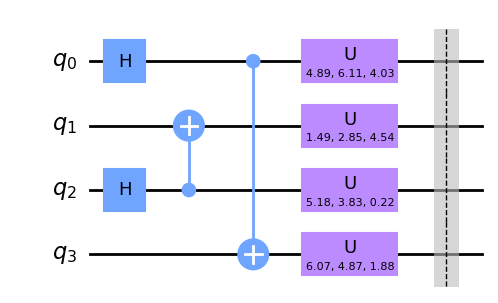

In [3]:
qc = QuantumCircuit(n)
qc.h(2)
qc.cx(2,1)
qc.h(0)
qc.cx(0,3)
for i in range(n):
    qc.u(initial_state_params[0,i], initial_state_params[1,i], initial_state_params[2,i], i)

# add a barrier so that the transpilation of the upper and lower half of the circuit is not mixed.
qc.barrier()
qc.draw('mpl')

The following data you already have, so there is no need in taking it again.

In [4]:
n_shots = 2000
data = np.load("Data_BeforeDA_FlipOdd.npy") # raw measurement data (flipped)

Given the data, we perform quantum state tomography and feed the data to the RL agent. 
The function below returns the next unitary to be applied to the circuit and the qubit indices on which it acts.

In [5]:
U, qubit_indices = get_next_unitary(data, qc, n_shots)

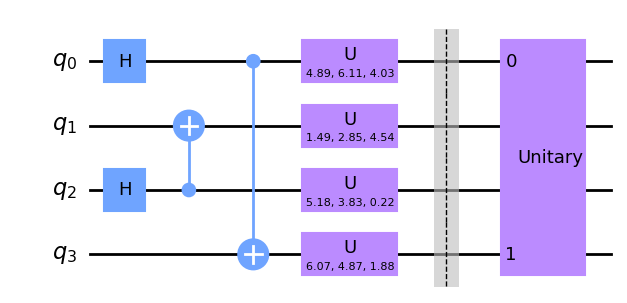

In [6]:
# append unitary to the circuit
qc.append(UnitaryGate(U), qubit_indices)
qc.draw('mpl')

After applying the new unitary above, you have to perform the measurements again. Once you have the data, you can execute the lines below to append the final disentangling unitary.

In [ ]:
data = np.load("Data_AfterFirstDisentanglingGate_FlipOdd.npy") # new data after measuring the circuit above
U, qubit_indices = get_next_unitary(data, qc, n_shots)
qc.append(UnitaryGate(U), qubit_indices)
qc.draw('mpl')

And finally, you have to perform the final measurements to see if the state is fully disentangled. 

In [ ]:
data = np.load("Data_AfterDA_FlipOdd_new.npy")
rdms = get_rdms_via_tomography(data.copy(), qc.copy(), n_shots)
ent_hardware = compute_entanglement_entropy(rdms)

Once you have completed all measurements, please send me all the shot data, so I can analyze it as well. Thanks a lot! :)